Read in character dialgoue file and look at columns.

In [1]:
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
import pandas as pd
df = pd.read_csv('gaurdians_dialogue.csv',encoding = "ISO-8859-1" )
df.head()

,Unnamed: 0,current_character,current_dialogue
0,1,M...,Do do do do do do do do do do do!
1,2,M...,"This way, my river lily."
2,3,M...,Where are you taking me?
3,4,M...,Oh. It's beautiful.
4,5,M...,"I was afraid it wouldn't take to the soil, bu..."


Set only necessary columns from file.

In [2]:
from io import StringIO
col=['current_character','current_dialogue']
df=df[col]
df.head()

,current_character,current_dialogue
0,M...,Do do do do do do do do do do do!
1,M...,"This way, my river lily."
2,M...,Where are you taking me?
3,M...,Oh. It's beautiful.
4,M...,"I was afraid it wouldn't take to the soil, bu..."


Remove any null values and trim away whitespace issues.

In [3]:
df=df[pd.notnull(df["current_character"])]
df=df[pd.notnull(df["current_dialogue"])]
df["current_character"]=df["current_character"].str.strip()
df["current_dialogue"]=df["current_dialogue"].str.strip()
df.head()

,current_character,current_dialogue
0,MEREDITH,Do do do do do do do do do do do!
1,MYSTERIOUS MAN,"This way, my river lily."
2,MEREDITH,Where are you taking me?
3,MEREDITH,Oh. It's beautiful.
4,MYSTERIOUS MAN,"I was afraid it wouldn't take to the soil, bu..."


Factorize the target column

In [4]:
df['category_id'] = df['current_character'].factorize()[0]
df.head(10)

,current_character,current_dialogue,category_id
0,MEREDITH,Do do do do do do do do do do do!,0
1,MYSTERIOUS MAN,"This way, my river lily.",1
2,MEREDITH,Where are you taking me?,0
3,MEREDITH,Oh. It's beautiful.,0
4,MYSTERIOUS MAN,"I was afraid it wouldn't take to the soil, bu...",1
5,MYSTERIOUS MAN,Soon it will be everywhere - all across the un...,1
6,MEREDITH,Which is what?,0
7,MYSTERIOUS MAN,Expansion.,1
8,MEREDITH,I'm not sure what you're talking about. But I ...,0
9,MYSTERIOUS MAN,"My heart is yours, Meredith Quill.",1


Create a lookup table (category id)

In [5]:
category_id_df = df[['current_character', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head()

,current_character,category_id
0,MEREDITH,0
1,MYSTERIOUS MAN,1
11,QUILL,2
12,GAMORA,3
19,DRAX,4


Create dictionaries for category

In [6]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'current_character']].values)
category_to_id
id_to_category

{0: 'MEREDITH',
 1: 'MYSTERIOUS MAN',
 2: 'QUILL',
 3: 'GAMORA',
 4: 'DRAX',
 5: 'ROCKET',
 6: 'GROOT',
 7: 'AYESHA',
 8: 'NEBULA',
 9: 'ADMIRAL',
 10: 'FRIGHTENED PILOT',
 11: 'TULLK',
 12: 'STAKAR',
 13: 'YONDU',
 14: 'PROPRIETOR',
 15: 'MONSTROUS RAVAGER',
 16: 'KRAGLIN',
 17: 'RETCH',
 18: 'EGO',
 19: 'MANTIS',
 20: 'TALL RAVAGER',
 21: 'BRAHL',
 22: 'OBLO',
 23: 'GEF THE RAVAGER',
 24: 'TASERFACE',
 25: 'SCURRILOUS RAVAGER',
 26: 'THE ENTIRE REAR UPPER QUADRANT OF THE ECLECTOR DETACHES FROM',
 27: 'GAMORA                      NEBULA',
 28: 'STAN LEE',
 29: 'AND THE LASERS BEAM OUT OF THE SHIP IN ALL DIRECTIONS AT',
 30: 'THE ENTIRE HOLLOW AROUND THEM BEGINS TO RUMBLE.   THE GROUND',
 31: 'OFFICER FITZGIBBON',
 32: 'WEIRD OLD MAN',
 33: 'GRANDPA QUILL',
 34: 'MARTINEX',
 35: 'ALETA',
 36: 'MAINFRAME',
 37: 'CHAMBERMAID',
 38: 'ADOLESCENT GROOT'}

Show a picture of number of categories

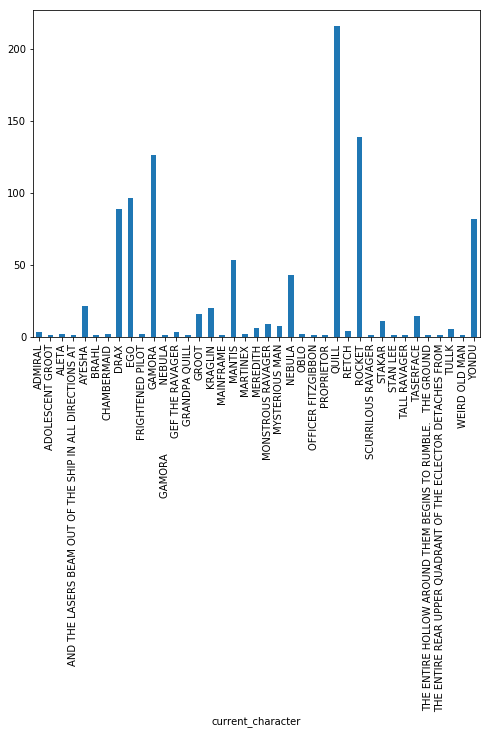

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('current_character').current_dialogue.count().plot.bar(ylim=0)
plt.show()

Calculate a tdidf frequency for dialogue

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.current_dialogue).toarray()
labels = df.category_id
features.shape

(987, 154)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for current_character, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_character))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'ADMIRAL':
  . Most correlated unigrams:
. high
. entire
  . Most correlated bigrams:
. don know
. high priestess
# 'ADOLESCENT GROOT':
  . Most correlated unigrams:
. like
. groot
  . Most correlated bigrams:
. unspoken thing
. don know
# 'ALETA':
  . Most correlated unigrams:
. yondu
. hell
  . Most correlated bigrams:
. unspoken thing
. don know
# 'AND THE LASERS BEAM OUT OF THE SHIP IN ALL DIRECTIONS AT':
  . Most correlated unigrams:
. like
. single
  . Most correlated bigrams:
. unspoken thing
. don know
# 'AYESHA':
  . Most correlated unigrams:
. sovereign
. guardians
  . Most correlated bigrams:
. unspoken thing
. don know
# 'BRAHL':
  . Most correlated unigrams:
. like
. ain
  . Most correlated bigrams:
. unspoken thing
. don know
# 'CHAMBERMAID':
  . Most correlated unigrams:
. priestess
. high
  . Most correlated bigrams:
. don know
. high priestess
# 'DRAX':
  . Most correlated unigrams:
. woman
. called
  . Most correlated bigrams:
. unspoken thing
. don know
# 'EGO':
  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['current_dialogue'], df['current_character'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has 

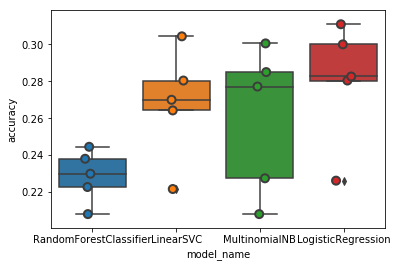

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [12]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.268148
LogisticRegression        0.280031
MultinomialNB             0.259670
RandomForestClassifier    0.228721
Name: accuracy, dtype: float64

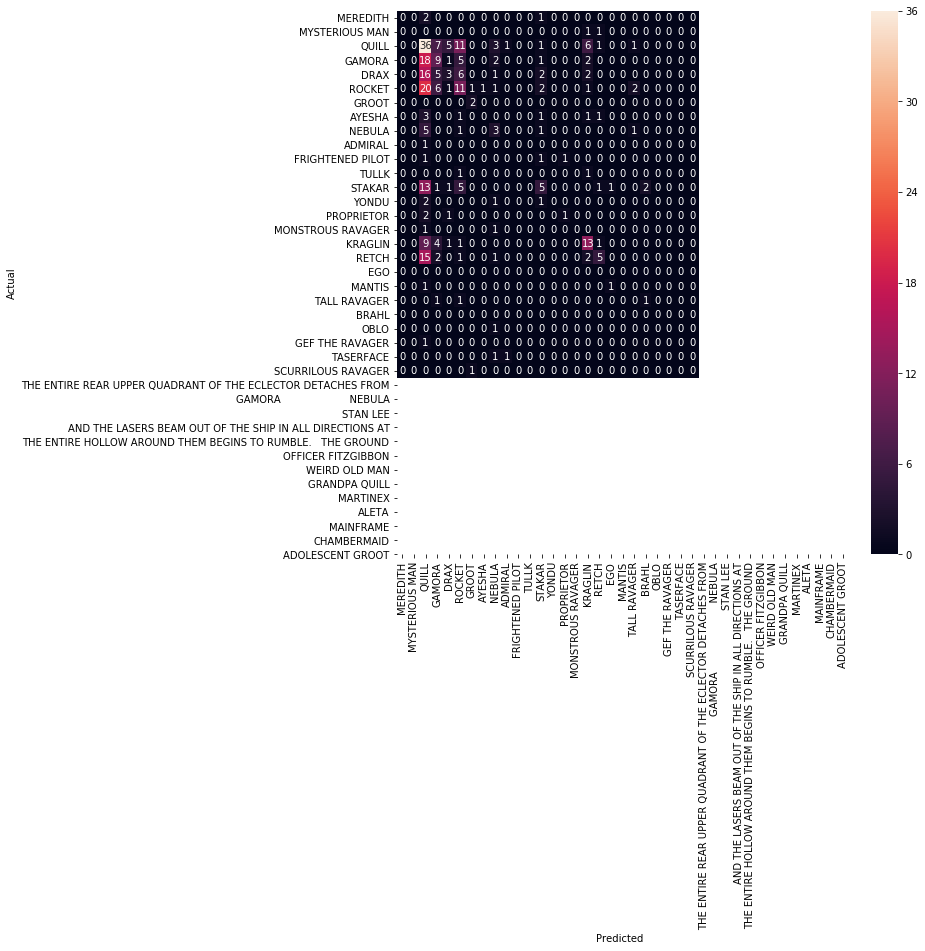

In [13]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.current_character.values, yticklabels=category_id_df.current_character.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [14]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['current_character', 'current_dialogue']])
            print('')

IndexError: index 26 is out of bounds for axis 0 with size 26

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['current_character'].unique()))

                                                              precision    recall  f1-score   support

                                                    MEREDITH       0.00      0.00      0.00         3
                                              MYSTERIOUS MAN       0.00      0.00      0.00         2
                                                       QUILL       0.25      0.50      0.33        72
                                                      GAMORA       0.26      0.24      0.25        38
                                                        DRAX       0.23      0.09      0.13        35
                                                      ROCKET       0.25      0.24      0.24        46
                                                       GROOT       0.50      1.00      0.67         2
                                                      AYESHA       0.00      0.00      0.00         7
                                                      NEBULA       0.20      0.27

C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\tf35\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
